Created on 9/03/23

By Matthew Chuang

Title: Exploratory Data Analysis of Housing Prices

Import important modules:

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

Take a look at the data:

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY   



<Axes: >

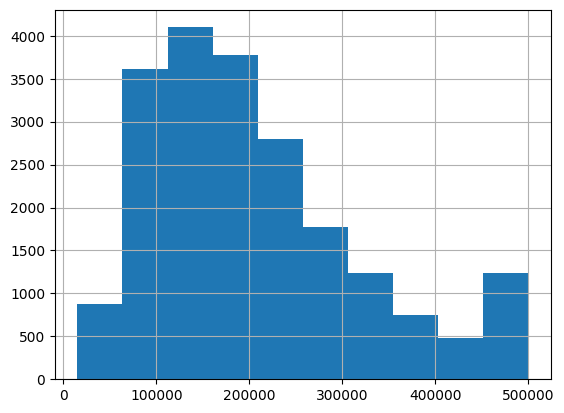

In [98]:
df = pd.read_csv('housing.csv')

print(df.head(), '\n')
df.shape

#statistics of each column: (this is to see what I can use as a predictor variable)
df.describe()

df['median_house_value'].hist()

I will be performing linear regression on this dataset of housing prices as a baseline model.
This will give me an idea of the relationship between variables and be able to predict housing price based on several different types of regression. 


By skimming the Data, I observed that the column total_bedrooms had a lot of missing values.
To solve this issue, I will be replacing the empty values with the mean, as to not skew the data.


Cleaning the Data:


In [89]:
df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace=True)

Because of the size of this data set, I will be using a train_test_split with a test size of 40% and a train size of 60%.
To ensure reproducibility, we will be using a random_state
Since median_income and median_house_value are depicted on different scales, I will standardize them. 

In [97]:
#predictor (x) variable:
x = df[['housing_median_age']] 

#response (y) variable:
y = df['median_house_value']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, train_size = 0.6, random_state = 21)



I will be performing KNN Regression. The first step is to choose a good value for K, which will represent the number of "neighbors" to consider when making a prediction. I will be using the MSE to see which K value is the best. The MSE serves as a way to measure the difference between predicted and actual values. 

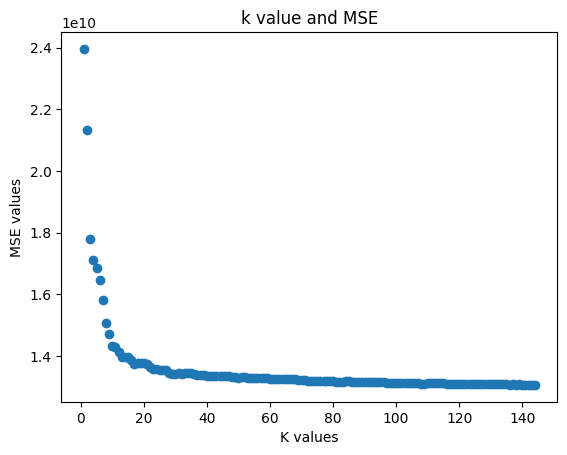

144


In [91]:
#testing a range of k values
k_min = 1
k_max = 144
k_list = np.linspace(k_min, k_max, num = 144, dtype = int)

k_dict = {}
#loop through k values
for k_value in k_list:
    model = KNeighborsRegressor(n_neighbors=int(k_value))
    #train model for k value:
    model.fit(x_train, y_train)
    y_predicted = model.predict(x_test)

    #find each MSE value and store it into a dictionary
    MSE = mean_squared_error(y_test, y_predicted)
    k_dict[k_value] = MSE

#Making sure there is a relationship between our K-values and MSE that corresponds to it
plt.scatter(list(k_dict.keys()),list(k_dict.values()))
plt.xlabel('K values')
plt.ylabel('MSE values')
plt.title('k value and MSE')
plt.show()

#The lower the MSE value, the better the k value in this case.
#Given MSE's formula that incorporates the difference between the true and predicted value for the observation, 
#a lower MSE means that the predictions are closer to the actual values. 
top_k_value = min(k_dict, key=k_dict.get)
#each value in the k_dict corresponds to a given MSE value (Kind of like hash_tables in c++)
print(top_k_value)

From this graph and for loop, it is clear that the highest K-value will hopefully give us the most accurate results. 

In [94]:
#define a function to find nearest neighbors

y_pred = []


def knn (x_train, x_test, y_train, y_test, k):
    for i, xi in enumerate(x_test.values):
        diff = pd.DataFrame((x_train.values - xi)**2, index = x_train.index) #from knn equation
        diff.columns = ['filled']

        #find the nearestneighbor
        nearestneighbor = diff.sort_values(by = 'filled').iloc[:k]
        Kmean = y_train[nearestneighbor.index].mean()
        y_pred.append(Kmean)
    actpred = pd.DataFrame({'y_true': y_test, 'y_pred': y_pred})
    return actpred

k = 144
best = knn(x_train, x_test, y_train, y_test, k)
best.head()

#the values we get from this function allow us to compare the actual values to the predicted values


,y_true,y_pred
18726,98800.0,185720.145833
1046,157200.0,183545.861111
15508,160900.0,179034.763889
828,206500.0,209707.006944
19007,101700.0,221343.090278
